Tedarik Zincirleri Veri Seti 

Type: Yapılan işlem türü

Days for shipping (real): Gerçekleşen Kargo Günleri

Days for shipment (scheduled): Planlanan Kargo Günleri

Benefit per order: Sipariş Başına Kazanç

Sales per customer: Müşteri Başına Satış

Delivery Status: Teslimat Durumu

Late_delivery_risk: Geç Teslimat Riski(1: Gecikmiş, 0: Gecikmemiş)

Category Id: Kategori Kimliği

Category Name: Kategori Adı

Customer City: Müşteri Şehri

Customer Country: Müşteri Ülkesi 

Customer Email: Müşteri E-postası

Customer Fname: Müşteri Adı 

Customer Id: Müşteri Kimliği
  
Customer Lname: Müşteri Soyadı

Customer Password: Müşteri Parolası

Customer Segment: Müşteri Segmenti

Customer State: Müşteri Eyaleti

Customer Street: Müşteri Sokağı

Customer Zipcode: Müşteri Posta Kodu

Department Id: Departman Kimliği

Department Nam: Departman Adı

Latitude: Enlem

Longitude: Boylam

Market: Pazar

Order City: Sipariş Şehri

Order Country: Sipariş Ülkesi

Order Customer Id: Sipariş Müşteri Kimliği

order date (DateOrders): Sipariş Tarihi

Order Id: Sipariş Kimliği

Order Item Cardprod Id: Sipariş Ürün Kartı Kimliği

Order Item Discount: Sipariş Ürün İndirimi

Order Item Discount Rate: Sipariş Ürün İndirimi Oranı

Order Item Id: Sipariş Ürün Kimliği

Order Item Product Price: Sipariş Ürün Fiyatı

Order Item Profit Ratio: Sipariş Ürün Kar Oranı

Order Item Quantity: Sipariş Ürün Miktarı

Sales: Satış

Order Item Total: Sipariş Öğesi Toplamı

Order Profit Per Order: Sipariş Başına Kar

Order Region: Sipariş Bölgesi

Order State: Sipariş Eyaleti

Order Status: Sipariş Durumu

Product Card Id: Ürün Kartı Kimliği

Product Category Id: Ürün Kategori Kimliği

Product Description: Ürün Açıklaması

Product Image: Ürün Görseli

Product Name: Ürün Adı

Product Price: Ürün Fiyatı

Product Status: Ürün Durumu(1 ise mevcut değil, 0 ürün mevcut)

Shipping date (DateOrders): Kargo Tarihi (DateOrders)

Shipping Mode: Kargo Modu

Amaç = Geç Teslimat Riski değerlendirmesi

In [888]:
# İlgili kütüphaneler import edilir
import pandas as pd
import numpy as np
import seaborn as sns
import missingno
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline
from warnings import filterwarnings
filterwarnings('ignore')

In [889]:
# Veri setini okumak
df = pd.read_csv("DataCoSupplyChainDataset.csv",delimiter=",",encoding="ISO-8859-1")
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [890]:
for i in df.columns:
    print(i)

Type
Days for shipping (real)
Days for shipment (scheduled)
Benefit per order
Sales per customer
Delivery Status
Late_delivery_risk
Category Id
Category Name
Customer City
Customer Country
Customer Email
Customer Fname
Customer Id
Customer Lname
Customer Password
Customer Segment
Customer State
Customer Street
Customer Zipcode
Department Id
Department Name
Latitude
Longitude
Market
Order City
Order Country
Order Customer Id
order date (DateOrders)
Order Id
Order Item Cardprod Id
Order Item Discount
Order Item Discount Rate
Order Item Id
Order Item Product Price
Order Item Profit Ratio
Order Item Quantity
Sales
Order Item Total
Order Profit Per Order
Order Region
Order State
Order Status
Order Zipcode
Product Card Id
Product Category Id
Product Description
Product Image
Product Name
Product Price
Product Status
shipping date (DateOrders)
Shipping Mode


In [891]:
# hedef değişkeni üzerinde etkisi olmayan ve kullanmayacağım sutunları drop edeceğim
df = df.drop(columns=["Category Id","Customer Email","Customer Fname","Customer Id","Customer Lname","Customer Password","Department Id","Order Customer Id","Order Id","Order Item Cardprod Id","Order Item Id","Product Card Id","Product Category Id","Product Image","Product Description","Customer City","Customer Street","Order City","Order Country","Order State","Product Name","order date (DateOrders)","shipping date (DateOrders)"])

In [892]:
#Toplam satır ve sütun sayısına bakmak
df.shape

(180519, 30)

In [893]:
# eksik veri kolonları
df.columns[df.isnull().any()]

Index(['Customer Zipcode', 'Order Zipcode'], dtype='object')

In [894]:
# eksik değerleri ve eksik değer yüzdelerine bakmak 

def eksik_data(df,n):
    eksik_değerler = df.isnull().sum().sort_values(ascending=False)

    eksik_değer_yüzdesi = (df.isnull().sum() / df.isnull().count()).sort_values(ascending=False) * 100

    eksik_data = pd.concat([eksik_değerler,eksik_değer_yüzdesi],axis=1,keys = ["Eksik Değerler","Eksik Değerler Yüzdesi"],sort=False)
    print(eksik_data.head(n))

eksik_data(df,6)

                     Eksik Değerler  Eksik Değerler Yüzdesi
Order Zipcode                155679               86.239676
Customer Zipcode                  3                0.001662
Type                              0                0.000000
Order Item Discount               0                0.000000
Product Status                    0                0.000000
Product Price                     0                0.000000


In [895]:
# Order Zipcode sutununun eksik değerleri çok fazla bu sutunu siliyorum ve Customer Zipcode sutununun eksik değerlerini 0 ile dolduruyorum

df = df.drop(columns="Order Zipcode")
df["Customer Zipcode"] = df["Customer Zipcode"].fillna(0)

In [896]:
df.head(2)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Name,Customer Country,Customer Segment,...,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order Status,Product Price,Product Status,Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,Sporting Goods,Puerto Rico,Consumer,...,0.29,1,327.75,314.640015,91.250000,Southeast Asia,COMPLETE,327.75,0,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,Sporting Goods,Puerto Rico,Consumer,...,-0.80,1,327.75,311.359985,-249.089996,South Asia,PENDING,327.75,0,Standard Class


In [897]:
# Eksik veri kontrolü yapmak
eksik_verilerin_toplamı = df.isnull().sum().sum()
print("Eksik verilerin toplamı:",eksik_verilerin_toplamı)

Eksik verilerin toplamı: 0


In [898]:
# sayısal değişkenlerin listesi
numerical_features_1 = [feature for feature in df.columns if df[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features_1))

# sayısal değişkenleri görelim
df[numerical_features_1].head(3)

Number of numerical variables:  18


,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Customer Zipcode,Latitude,Longitude,Order Item Discount,Order Item Discount Rate,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Product Price,Product Status
0,3,4,91.250000,314.640015,0,725.0,18.251453,-66.037056,13.110000,0.04,327.75,0.29,1,327.75,314.640015,91.250000,327.75,0
1,5,4,-249.089996,311.359985,1,725.0,18.279451,-66.037064,16.389999,0.05,327.75,-0.80,1,327.75,311.359985,-249.089996,327.75,0
2,4,4,-247.779999,309.720001,0,95125.0,37.292233,-121.881279,18.030001,0.06,327.75,-0.80,1,327.75,309.720001,-247.779999,327.75,0


In [899]:
# kesikli değiken sayısını bul
discrete_features=[feature for feature in numerical_features_1 if len(df[feature].unique())<25]
print("Kesikli Değişken Sayısı: {}".format(len(discrete_features)))

Kesikli Değişken Sayısı: 6


In [900]:
# Sürekli Değişken Sayısını bul
continuous_feature=[feature for feature in numerical_features_1 if feature not in discrete_features]
print("Sürekli Değişken Sayısı {}".format(len(continuous_feature)))

Sürekli Değişken Sayısı 12


In [832]:
# sayısal sürekli değişkenleri görelim
df[continuous_feature].head(3)

,Benefit per order,Sales per customer,Customer Zipcode,Latitude,Longitude,Order Item Discount,Order Item Product Price,Order Item Profit Ratio,Sales,Order Item Total,Order Profit Per Order,Product Price
0,91.250000,314.640015,725.0,18.251453,-66.037056,13.110000,327.75,0.29,327.75,314.640015,91.250000,327.75
1,-249.089996,311.359985,725.0,18.279451,-66.037064,16.389999,327.75,-0.80,327.75,311.359985,-249.089996,327.75
2,-247.779999,309.720001,95125.0,37.292233,-121.881279,18.030001,327.75,-0.80,327.75,309.720001,-247.779999,327.75


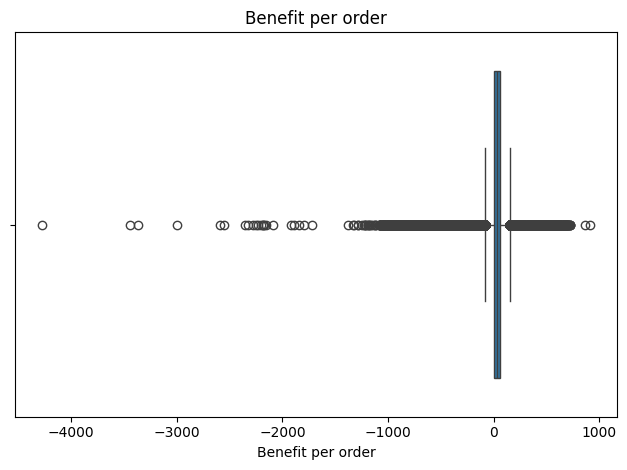

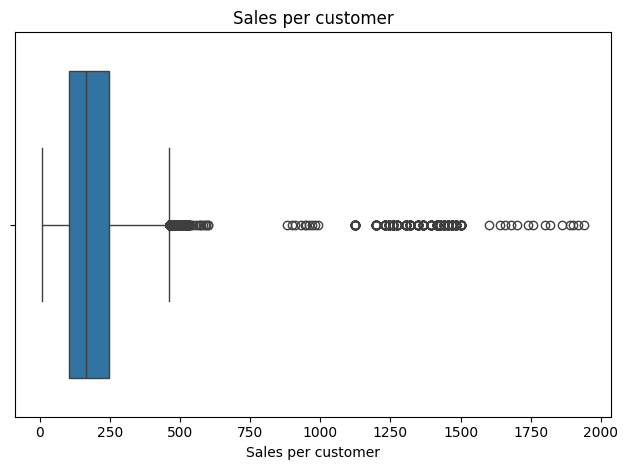

Customer Zipcode sütununda aykırı değer bulunmamaktadır.


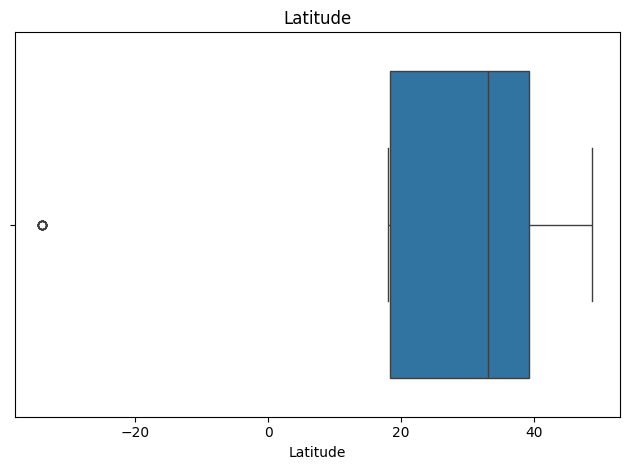

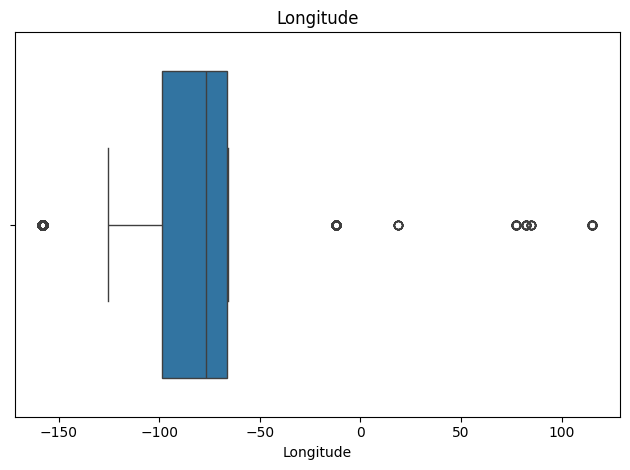

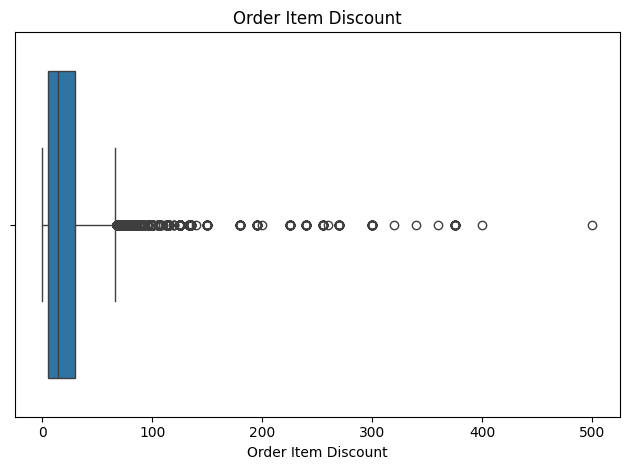

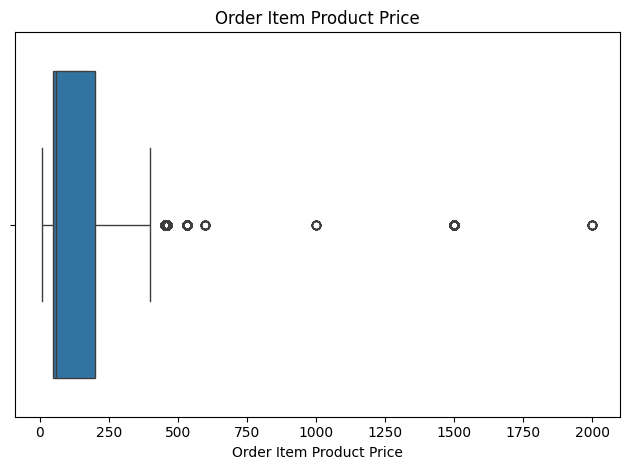

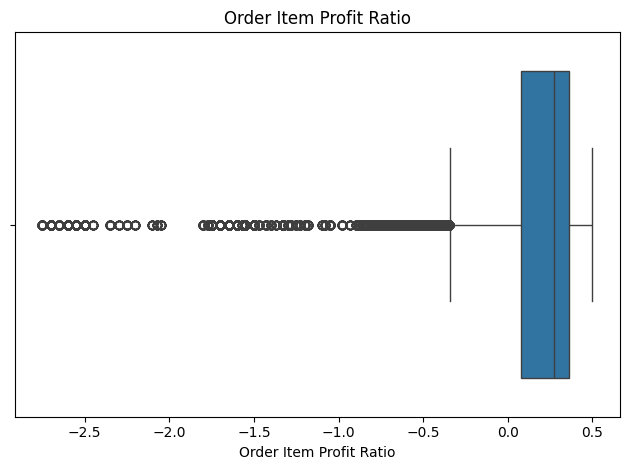

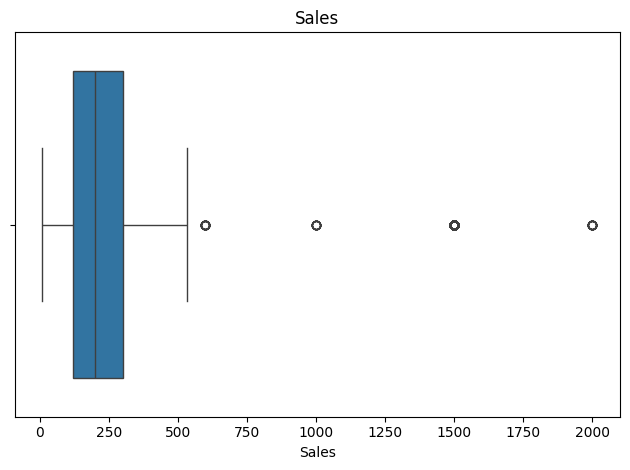

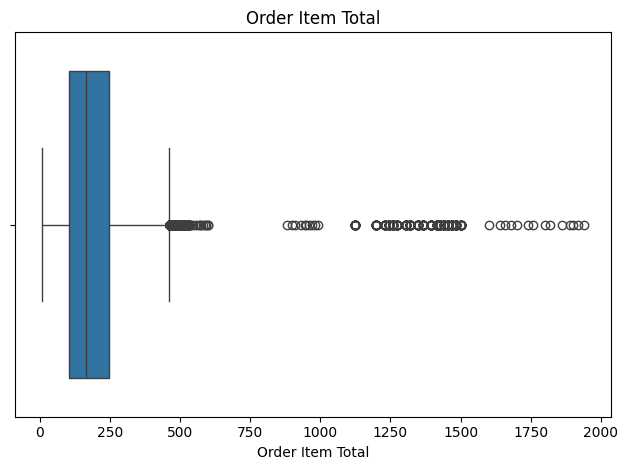

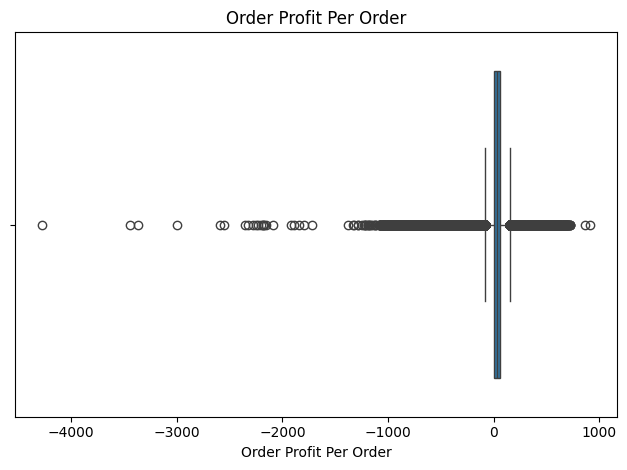

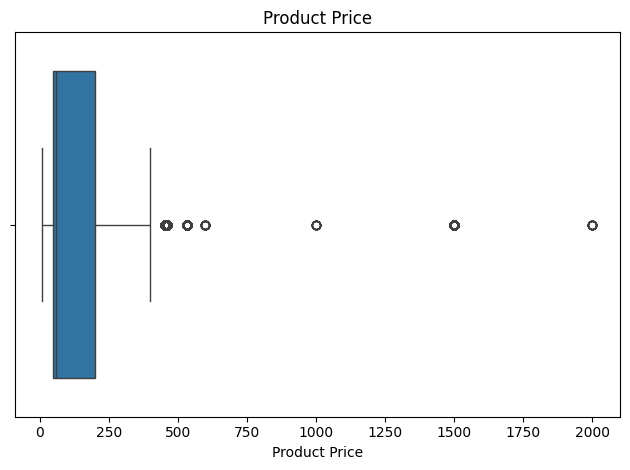

In [833]:
# continuous_feature kolonlarının Boxplot grafiği çizip aykırı değerleri değerlendirmek
for col in continuous_feature:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Sadece aykırı değerlere sahip sütunları çiz
    if any((df[col] < lower_limit) | (df[col] > upper_limit)):
        sns.boxplot(x=df[col])
        plt.title(col)
        plt.tight_layout()
        plt.show()
    else:
        print(f"{col} sütununda aykırı değer bulunmamaktadır.")

In [834]:
# continuous_feature kolonları min-max ile baskılamak


def aykiri_degerleri_min_max_sinirlar_ile_doldur(df, sutunlar):
    for col in sutunlar:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        alt_sinir = Q1 - 1.5 * IQR
        ust_sinir = Q3 + 1.5 * IQR

        df.loc[df[col] < alt_sinir, col] = alt_sinir
        df.loc[df[col] > ust_sinir, col] = ust_sinir

    
        
    return df

# Aykırı değerleri düzeltmek istediğiniz sütunları seçin
secilen_sutunlar = continuous_feature

# Aykırı değerleri düzelt
df = aykiri_degerleri_min_max_sinirlar_ile_doldur(df, secilen_sutunlar)

In [835]:
for col in continuous_feature:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Sadece aykırı değerlere sahip sütunları çiz
    if any((df[col] < lower_limit) | (df[col] > upper_limit)):
        sns.boxplot(x=df[col])
        plt.title(col)
        plt.tight_layout()
        plt.show()
    else:
        print(f"{col} sütununda aykırı değer bulunmamaktadır.")

Benefit per order sütununda aykırı değer bulunmamaktadır.
Sales per customer sütununda aykırı değer bulunmamaktadır.
Customer Zipcode sütununda aykırı değer bulunmamaktadır.
Latitude sütununda aykırı değer bulunmamaktadır.
Longitude sütununda aykırı değer bulunmamaktadır.
Order Item Discount sütununda aykırı değer bulunmamaktadır.
Order Item Product Price sütununda aykırı değer bulunmamaktadır.
Order Item Profit Ratio sütununda aykırı değer bulunmamaktadır.
Sales sütununda aykırı değer bulunmamaktadır.
Order Item Total sütununda aykırı değer bulunmamaktadır.
Order Profit Per Order sütununda aykırı değer bulunmamaktadır.
Product Price sütununda aykırı değer bulunmamaktadır.


In [836]:
def sütunlari_veri_türune_gore_grupla(df):
    result_dict = {}
    for col, dtype in df.dtypes.items():
        dtype_str = str(dtype)       
        if dtype_str not in result_dict:
            result_dict[dtype_str] = []      
        result_dict[dtype_str].append(col)
    result_str = ""
    for dtype, columns in result_dict.items():
        result_str += f"\n{dtype} Veri Türü Sütunları:\n"
        result_str += ', '.join(columns) + '\n'
        result_str += '=' * 50 + '\n'
    return result_str
result = sütunlari_veri_türune_gore_grupla(df)
print(result)


object Veri Türü Sütunları:
Type, Delivery Status, Category Name, Customer Country, Customer Segment, Customer State, Department Name, Market, Order Region, Order Status, Shipping Mode

int64 Veri Türü Sütunları:
Days for shipping (real), Days for shipment (scheduled), Late_delivery_risk, Order Item Quantity, Product Status

float64 Veri Türü Sütunları:
Benefit per order, Sales per customer, Customer Zipcode, Latitude, Longitude, Order Item Discount, Order Item Discount Rate, Order Item Product Price, Order Item Profit Ratio, Sales, Order Item Total, Order Profit Per Order, Product Price



In [837]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first', dtype=int)
target_columns = ["Type","Delivery Status","Customer Country","Customer Segment","Market","Shipping Mode"]
for target_column in target_columns:
    if df[target_column].dtype == 'object':
        encoded_values = encoder.fit_transform(df[[target_column]])
        encoded_columns = encoder.get_feature_names_out([target_column])
        df[encoded_columns] = encoded_values
        df.drop(columns=[target_column], inplace=True)

df.head(3)

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Name,Customer State,Customer Zipcode,Department Name,Latitude,...,Customer Country_Puerto Rico,Customer Segment_Corporate,Customer Segment_Home Office,Market_Europe,Market_LATAM,Market_Pacific Asia,Market_USCA,Shipping Mode_Same Day,Shipping Mode_Second Class,Shipping Mode_Standard Class
0,3,4,91.250000,314.640015,0,Sporting Goods,PR,725.0,Fitness,18.251453,...,1,0,0,0,0,1,0,0,0,1
1,5,4,-79.700005,311.359985,1,Sporting Goods,PR,725.0,Fitness,18.279451,...,1,0,0,0,0,1,0,0,0,1
2,4,4,-79.700005,309.720001,0,Sporting Goods,CA,95125.0,Fitness,37.292233,...,0,0,0,0,0,1,0,0,0,1


In [838]:
def sütunlari_veri_türune_gore_grupla(df):
    result_dict = {}
    for col, dtype in df.dtypes.items():
        dtype_str = str(dtype)       
        if dtype_str not in result_dict:
            result_dict[dtype_str] = []      
        result_dict[dtype_str].append(col)
    result_str = ""
    for dtype, columns in result_dict.items():
        result_str += f"\n{dtype} Veri Türü Sütunları:\n"
        result_str += ', '.join(columns) + '\n'
        result_str += '=' * 50 + '\n'
    return result_str
result = sütunlari_veri_türune_gore_grupla(df)
print(result)


int64 Veri Türü Sütunları:
Days for shipping (real), Days for shipment (scheduled), Late_delivery_risk, Order Item Quantity, Product Status

float64 Veri Türü Sütunları:
Benefit per order, Sales per customer, Customer Zipcode, Latitude, Longitude, Order Item Discount, Order Item Discount Rate, Order Item Product Price, Order Item Profit Ratio, Sales, Order Item Total, Order Profit Per Order, Product Price

object Veri Türü Sütunları:
Category Name, Customer State, Department Name, Order Region, Order Status

int32 Veri Türü Sütunları:
Type_DEBIT, Type_PAYMENT, Type_TRANSFER, Delivery Status_Late delivery, Delivery Status_Shipping canceled, Delivery Status_Shipping on time, Customer Country_Puerto Rico, Customer Segment_Corporate, Customer Segment_Home Office, Market_Europe, Market_LATAM, Market_Pacific Asia, Market_USCA, Shipping Mode_Same Day, Shipping Mode_Second Class, Shipping Mode_Standard Class



In [839]:
# Category Name değerlerini benzer özelliklerine göre gruplayıp one hot encoder uygulayacağım. diğer kolonlara da aynı işlenleri yapacağım

kategori_grupları = {
    'Spor': ['Sporting Goods', 'Cleats', 'Shop By Sport', "Women's Apparel",
             "Men's Footwear", 'Baseball & Softball', "Kids' Golf Clubs",
             "Girls' Apparel", "Children's Clothing", 'Boxing & MMA',
             'Cardio Equipment', 'Tennis & Racquet', 'Fitness Accessories',
             'Golf Balls', 'Golf Gloves', 'Golf Bags & Carts', 'Golf Shoes',
             'Golf Apparel', "Women's Golf Clubs", "Men's Golf Clubs",
             'Basketball', 'Soccer', 'Lacrosse', 'Water Sports', 'Indoor/Outdoor Games'],
    'Elektronik': ['Electronics', 'Consumer Electronics', 'Cameras', 'Computers'],
    'Aksesuarlar': ['Accessories', 'Crafts', 'As Seen on TV!', 'Toys'],
    'Diğer': ['Trade-In', 'Hunting & Shooting', 'Camping & Hiking', 'Baby', 'Fishing',
              'Books', 'DVDs', 'CDs', 'Garden', 'Hockey', 'Pet Supplies',
              'Health and Beauty', 'Music', 'Video Games']
}

def kategori_guncelle(kategori):
    for grup, kategoriler in kategori_grupları.items():
        if kategori in kategoriler:
            return grup
    return 'Diğer'
df['Category Name'] = df['Category Name'].map(kategori_guncelle)
df.head(2)

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Name,Customer State,Customer Zipcode,Department Name,Latitude,...,Customer Country_Puerto Rico,Customer Segment_Corporate,Customer Segment_Home Office,Market_Europe,Market_LATAM,Market_Pacific Asia,Market_USCA,Shipping Mode_Same Day,Shipping Mode_Second Class,Shipping Mode_Standard Class
0,3,4,91.250000,314.640015,0,Spor,PR,725.0,Fitness,18.251453,...,1,0,0,0,0,1,0,0,0,1
1,5,4,-79.700005,311.359985,1,Spor,PR,725.0,Fitness,18.279451,...,1,0,0,0,0,1,0,0,0,1


In [840]:
# Eyalet kodlarını coğrafi bölgelere göre gruplama
def grupla_eyalet(eyalet):
    if eyalet in ['CA', 'OR', 'WA', 'NV', 'ID', 'MT', 'WY', 'UT', 'CO', 'AZ', 'NM',
                  'ND', 'SD', 'NE', 'KS', 'MN', 'IA', 'MO', 'WI', 'IL', 'IN', 'MI', 'OH']:
        return 'Batı ve Orta Batı'
    elif eyalet in ['TX', 'OK', 'LA', 'AR', 'MS', 'AL', 'TN', 'KY']:
        return 'Güney'
    elif eyalet in ['FL', 'GA', 'SC', 'NC', 'VA', 'WV', 'MD', 'DE', 'DC']:
        return 'Güney Doğu'
    elif eyalet in ['PA', 'NY', 'NJ', 'CT', 'RI', 'MA', 'NH', 'VT', 'ME']:
        return 'Kuzey Doğu'
    elif eyalet in ['AK', 'HI']:
        return 'Hawaii ve Alaska'
    else:
        return 'Bilinmiyor'
df['Customer State'] = df['Customer State'].map(grupla_eyalet)
df.head(2)

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Name,Customer State,Customer Zipcode,Department Name,Latitude,...,Customer Country_Puerto Rico,Customer Segment_Corporate,Customer Segment_Home Office,Market_Europe,Market_LATAM,Market_Pacific Asia,Market_USCA,Shipping Mode_Same Day,Shipping Mode_Second Class,Shipping Mode_Standard Class
0,3,4,91.250000,314.640015,0,Spor,Bilinmiyor,725.0,Fitness,18.251453,...,1,0,0,0,0,1,0,0,0,1
1,5,4,-79.700005,311.359985,1,Spor,Bilinmiyor,725.0,Fitness,18.279451,...,1,0,0,0,0,1,0,0,0,1


In [841]:
def grupla_departman(departman):
    if departman in ['Fitness', 'Outdoors', 'Pet Shop', 'Health and Beauty']:
        return 'Spor ve Sağlık'
    elif departman in ['Apparel', 'Footwear', 'Fan Shop', 'Book Shop']:
        return 'Giyim ve Aksesuar'
    elif departman in ['Golf', 'Discs Shop']:
        return 'Golf ve Diskler'
    elif departman == 'Technology':
        return 'Teknoloji'
    else:
        return 'Diğer'

# Departmanları gruplama ve yeni gruplanmış sütunu oluşturma
df['Department Name'] = df['Department Name'].map(grupla_departman)
df.head(2)

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Name,Customer State,Customer Zipcode,Department Name,Latitude,...,Customer Country_Puerto Rico,Customer Segment_Corporate,Customer Segment_Home Office,Market_Europe,Market_LATAM,Market_Pacific Asia,Market_USCA,Shipping Mode_Same Day,Shipping Mode_Second Class,Shipping Mode_Standard Class
0,3,4,91.250000,314.640015,0,Spor,Bilinmiyor,725.0,Spor ve Sağlık,18.251453,...,1,0,0,0,0,1,0,0,0,1
1,5,4,-79.700005,311.359985,1,Spor,Bilinmiyor,725.0,Spor ve Sağlık,18.279451,...,1,0,0,0,0,1,0,0,0,1


In [842]:
# Bölgeleri gruplama fonksiyonu
def grupla_bolge(bolge):
    if bolge in ['Southeast Asia', 'South Asia', 'Eastern Asia', 'Oceania', 'West Asia', 'Central Asia']:
        return 'Asya ve Pasifik'
    elif bolge in ['West Africa', 'Central Africa', 'North Africa', 'East Africa', 'Southern Africa']:
        return 'Afrika'
    elif bolge in ['Western Europe', 'Northern Europe', 'Southern Europe', 'Eastern Europe']:
        return 'Avrupa'
    elif bolge in ['South America', 'Central America', 'Caribbean', 'West of USA', 'US Center', 'East of USA', 'Canada', 'South of USA']:
        return 'Amerika'
    else:
        return 'Diğer'
df['Order Region'] = df['Order Region'].map(grupla_bolge)
df.head(2)

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Name,Customer State,Customer Zipcode,Department Name,Latitude,...,Customer Country_Puerto Rico,Customer Segment_Corporate,Customer Segment_Home Office,Market_Europe,Market_LATAM,Market_Pacific Asia,Market_USCA,Shipping Mode_Same Day,Shipping Mode_Second Class,Shipping Mode_Standard Class
0,3,4,91.250000,314.640015,0,Spor,Bilinmiyor,725.0,Spor ve Sağlık,18.251453,...,1,0,0,0,0,1,0,0,0,1
1,5,4,-79.700005,311.359985,1,Spor,Bilinmiyor,725.0,Spor ve Sağlık,18.279451,...,1,0,0,0,0,1,0,0,0,1


In [843]:
df.head(2)

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Name,Customer State,Customer Zipcode,Department Name,Latitude,...,Customer Country_Puerto Rico,Customer Segment_Corporate,Customer Segment_Home Office,Market_Europe,Market_LATAM,Market_Pacific Asia,Market_USCA,Shipping Mode_Same Day,Shipping Mode_Second Class,Shipping Mode_Standard Class
0,3,4,91.250000,314.640015,0,Spor,Bilinmiyor,725.0,Spor ve Sağlık,18.251453,...,1,0,0,0,0,1,0,0,0,1
1,5,4,-79.700005,311.359985,1,Spor,Bilinmiyor,725.0,Spor ve Sağlık,18.279451,...,1,0,0,0,0,1,0,0,0,1


In [844]:
def sütunlari_veri_türune_gore_grupla(df):
    result_dict = {}
    for col, dtype in df.dtypes.items():
        dtype_str = str(dtype)       
        if dtype_str not in result_dict:
            result_dict[dtype_str] = []      
        result_dict[dtype_str].append(col)
    result_str = ""
    for dtype, columns in result_dict.items():
        result_str += f"\n{dtype} Veri Türü Sütunları:\n"
        result_str += ', '.join(columns) + '\n'
        result_str += '=' * 50 + '\n'
    return result_str
result = sütunlari_veri_türune_gore_grupla(df)
print(result)


int64 Veri Türü Sütunları:
Days for shipping (real), Days for shipment (scheduled), Late_delivery_risk, Order Item Quantity, Product Status

float64 Veri Türü Sütunları:
Benefit per order, Sales per customer, Customer Zipcode, Latitude, Longitude, Order Item Discount, Order Item Discount Rate, Order Item Product Price, Order Item Profit Ratio, Sales, Order Item Total, Order Profit Per Order, Product Price

object Veri Türü Sütunları:
Category Name, Customer State, Department Name, Order Region, Order Status

int32 Veri Türü Sütunları:
Type_DEBIT, Type_PAYMENT, Type_TRANSFER, Delivery Status_Late delivery, Delivery Status_Shipping canceled, Delivery Status_Shipping on time, Customer Country_Puerto Rico, Customer Segment_Corporate, Customer Segment_Home Office, Market_Europe, Market_LATAM, Market_Pacific Asia, Market_USCA, Shipping Mode_Same Day, Shipping Mode_Second Class, Shipping Mode_Standard Class



In [845]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first', dtype=int)
target_columns = ["Category Name","Customer State","Department Name","Order Region","Order Status"]
for target_column in target_columns:
    if df[target_column].dtype == 'object':
        encoded_values = encoder.fit_transform(df[[target_column]])
        encoded_columns = encoder.get_feature_names_out([target_column])
        df[encoded_columns] = encoded_values
        df.drop(columns=[target_column], inplace=True)

In [846]:
def sütunlari_veri_türune_gore_grupla(df):
    result_dict = {}
    for col, dtype in df.dtypes.items():
        dtype_str = str(dtype)       
        if dtype_str not in result_dict:
            result_dict[dtype_str] = []      
        result_dict[dtype_str].append(col)
    result_str = ""
    for dtype, columns in result_dict.items():
        result_str += f"\n{dtype} Veri Türü Sütunları:\n"
        result_str += ', '.join(columns) + '\n'
        result_str += '=' * 50 + '\n'
    return result_str
result = sütunlari_veri_türune_gore_grupla(df)
print(result)


int64 Veri Türü Sütunları:
Days for shipping (real), Days for shipment (scheduled), Late_delivery_risk, Order Item Quantity, Product Status

float64 Veri Türü Sütunları:
Benefit per order, Sales per customer, Customer Zipcode, Latitude, Longitude, Order Item Discount, Order Item Discount Rate, Order Item Product Price, Order Item Profit Ratio, Sales, Order Item Total, Order Profit Per Order, Product Price

int32 Veri Türü Sütunları:
Type_DEBIT, Type_PAYMENT, Type_TRANSFER, Delivery Status_Late delivery, Delivery Status_Shipping canceled, Delivery Status_Shipping on time, Customer Country_Puerto Rico, Customer Segment_Corporate, Customer Segment_Home Office, Market_Europe, Market_LATAM, Market_Pacific Asia, Market_USCA, Shipping Mode_Same Day, Shipping Mode_Second Class, Shipping Mode_Standard Class, Category Name_Diğer, Category Name_Elektronik, Category Name_Spor, Customer State_Bilinmiyor, Customer State_Güney, Customer State_Güney Doğu, Customer State_Hawaii ve Alaska, Customer Sta

In [847]:
yer_değiştir = df.pop('Late_delivery_risk')
df['Late_delivery_risk'] = yer_değiştir
df.head(3)

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Customer Zipcode,Latitude,Longitude,Order Item Discount,Order Item Discount Rate,Order Item Product Price,...,Order Region_Diğer,Order Status_CLOSED,Order Status_COMPLETE,Order Status_ON_HOLD,Order Status_PAYMENT_REVIEW,Order Status_PENDING,Order Status_PENDING_PAYMENT,Order Status_PROCESSING,Order Status_SUSPECTED_FRAUD,Late_delivery_risk
0,3,4,91.250000,314.640015,725.0,18.251453,-66.037056,13.110000,0.04,327.75,...,0,0,1,0,0,0,0,0,0,0
1,5,4,-79.700005,311.359985,725.0,18.279451,-66.037064,16.389999,0.05,327.75,...,0,0,0,0,0,1,0,0,0,1
2,4,4,-79.700005,309.720001,95125.0,37.292233,-121.881279,18.030001,0.06,327.75,...,0,1,0,0,0,0,0,0,0,0


Late_delivery_risk
1    98977
0    81542
Name: count, dtype: int64


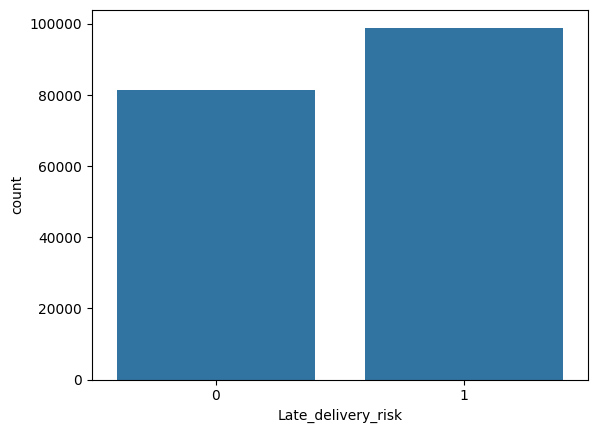

In [848]:
# hedef sutuumuz içerisinde ki gözlem sayısını hesaplayalım ve dağılımını kontrol edelim. hemen hemen yarı yarıya olması lazım

oran = df["Late_delivery_risk"].value_counts()
print(oran)

sns.countplot(x="Late_delivery_risk",data=df)
plt.show()

In [849]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [850]:
# rastgele train/test olarak bolelim
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42,stratify=y)

In [851]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.transform(X_test)

In [852]:
df.shape

(180519, 58)

In [853]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [854]:
y_pred = classifier.predict(X_test)

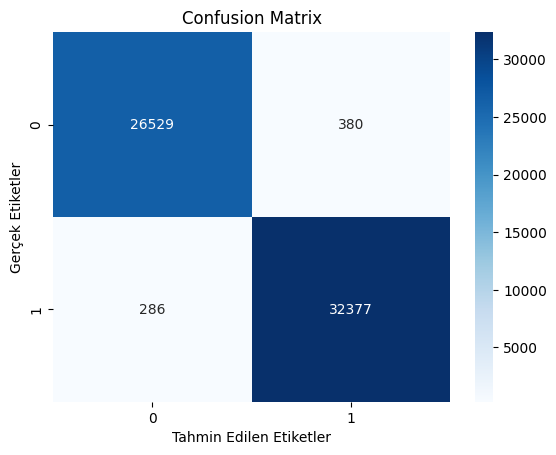

In [855]:
# Confusion Matrix

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Tahmin Edilen Etiketler")
plt.ylabel("Gerçek Etiketler")
plt.show()

In [856]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
f1_Score = f1_score(y_test,y_pred)

print("precision:",precision)
print("recall:",recall)
print("accuracy:",accuracy)
print("f1_Score:",f1_Score)

precision: 0.988399426076869
recall: 0.9912439151333313
accuracy: 0.9888202511246894
f1_Score: 0.9898196270253745


In [857]:
y_pred_train = classifier.predict(X_train)

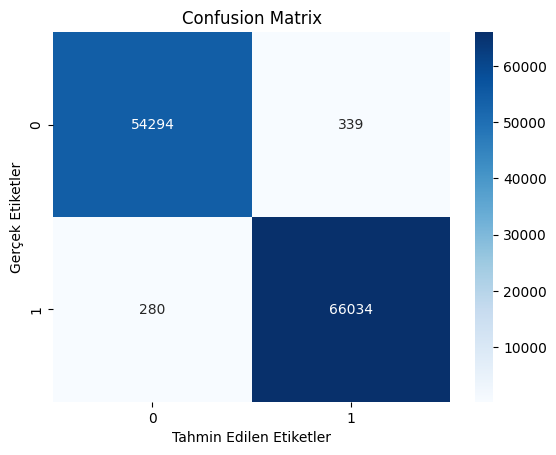

In [858]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train, y_pred_train)
sns.heatmap(cm,annot=True,fmt="d",cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Tahmin Edilen Etiketler")
plt.ylabel("Gerçek Etiketler")
plt.show()

In [859]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

print("Train verisi")
precision = precision_score(y_train,y_pred_train)
recall = recall_score(y_train,y_pred_train)
accuracy = accuracy_score(y_train,y_pred_train)
f1_Score = f1_score(y_train,y_pred_train)

print("precision:",precision)
print("recall:",recall)
print("accuracy:",accuracy)
print("f1_Score:",f1_Score)

print("\n")

print("Test verisi")
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
f1_Score = f1_score(y_test,y_pred)

print("precision:",precision)
print("recall:",recall)
print("accuracy:",accuracy)
print("f1_Score:",f1_Score)

Train verisi
precision: 0.9948925014689708
recall: 0.9957776638417227
accuracy: 0.9948820557764971
f1_Score: 0.9953348858592025


Test verisi
precision: 0.988399426076869
recall: 0.9912439151333313
accuracy: 0.9888202511246894
f1_Score: 0.9898196270253745
